## KennRaster.ipynb, Kennicott Glacier loader, viewer, histogram builder
### Mike Loso, Updated 12/4/2021

This code imports a raster image (.tif file), plots it, creates a histogram of the raster in 10 m bins, then saves the histogram as a pickle. 


In [5]:
## IMPORT PACKAGES

import matplotlib.pyplot as plt
import os, csv
import pandas as pd
import numpy as np
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import rasterio.plot as rp

%matplotlib inline

In [9]:
## LOAD THREE RASTERS

# set working directory
data_dir = r'~/MLo/KennGlac/data'

# Define paths

# Define relative path to file (this is the full glacier dem)
dem_path_full = os.path.join(data_dir,
                            '2013andRGI6_clip_IFSAR.tif')

# Define relative path to file (this is the debris-only dem)
dem_path_debris = os.path.join(data_dir,
                            "2013_debris_clip.tif")
    
# Define relative path to file (this is the clean-ice dem)
dem_path_clean = os.path.join(data_dir,
                            "2013_clean_clip.tif")

# Opening dems with rasterio, converting them into 2d arrays
# masked=true removes no data values
dtm_full=rxr.open_rasterio(dem_path_full, masked=True)

dtm_debris=rxr.open_rasterio(dem_path_debris, masked=True)

dtm_clean=rxr.open_rasterio(dem_path_clean, masked=True)

# view dimensions (HxW) for the full DEM ONLY
print('dtm shape: ',dtm_full.shape)
print('dtm object type: ', type(dtm_full))

# find minimum and maximum values in dem
print('minimum value is ',dtm_full.min())
print('maximum value is ',dtm_full.max())

/home/mycloso/MLo/KennGlac/data/2013andRGI6_clip_IFSAR.tif
/home/mycloso/MLo/KennGlac/data/2013andRGI6_clip_IFSAR.tif


RasterioIOError: TIFFReadDirectory:Failed to read directory at offset 1371389935

In [4]:
# VIEW DEMS AS HILLSHADES (JUST THE FULL DEM IN THIS EXAMPLE)

# Opening dems with rasterio, converting them into 2d arrays
# masked=true removes no data values
dtm_full_data=rio.open(dem_path_full, masked=True)
dtm_full_rio=dtm_full_data.read(1)

hillshade = es.hillshade(dtm_full_rio)
ep.plot_bands(hillshade,
              title='Kennicott Glacier from IFSAR \nClipped by RGI 6.0 and manual editing',
              cbar=False,
              figsize = (20,20))
              
plt.show()

RasterioIOError: ~/MLo/KennGlac/data/2013andRGI6_clip_IFSAR.tif: No such file or directory

In [12]:
## SET UP HISTOGRAMS

# Our four dems are 'dtm_full', 'dtm_clean', and 'dtm_debris'
# create bins
binsize=10
binss=np.arange(400,4970,binsize)

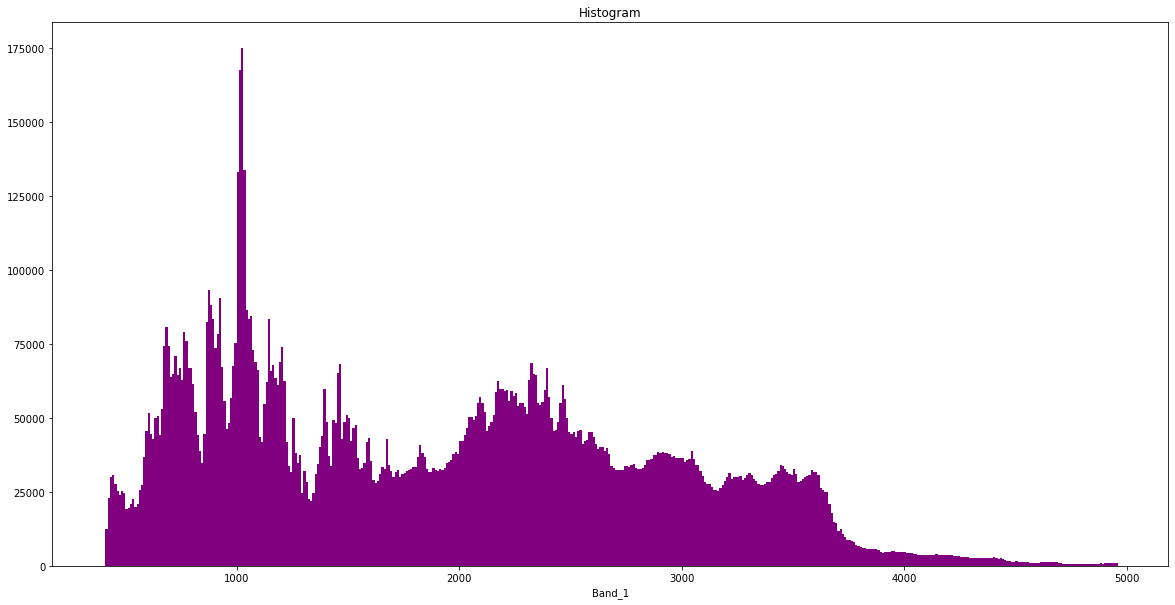

In [13]:
## MAKE HISTOGRAM OF DTM_FULL

# set figure parameters
f,ax=plt.subplots(figsize=(20,10))

# This does the job for 'dtm_full'
dtm_full.plot.hist(ax=ax,
              color='purple',
             bins=binss)
# get histogram data
p=ax.patches
# p[0].get_xy() gives xy coordinate of left edge of first bar (lower bin edge)
# p[0].get_width() gives width of bar (bin size)
# p[0].get_height() gives height of first bar (number pixels in bin)
heights=[patch.get_height() for patch in p]
binedgeL=[patch.get_xy() for patch in p]
# get first element of two element tuples
binedgeL=[x[0] for x in binedgeL]
# convert lists to array
binedgeL=np.array(binedgeL)
# heights is array of number of pixels in each bin
heights=np.array(heights)
# binedgeL and binedgeR are arrays of bin edges at 10 m intervals
binedgeR=binedgeL+binsize
# bincenters is array of bin centers in m
bincenters=np.mean([binedgeR,binedgeL],axis=0)

# collate table with generic variables
data={'binedgeR': binedgeR, 'binedgeL': binedgeL, 'bincenters':bincenters, 'heights': heights}
# assign to pandas dataframe specific to full glacier
fullbins=pd.DataFrame(data=data)

plt.show()

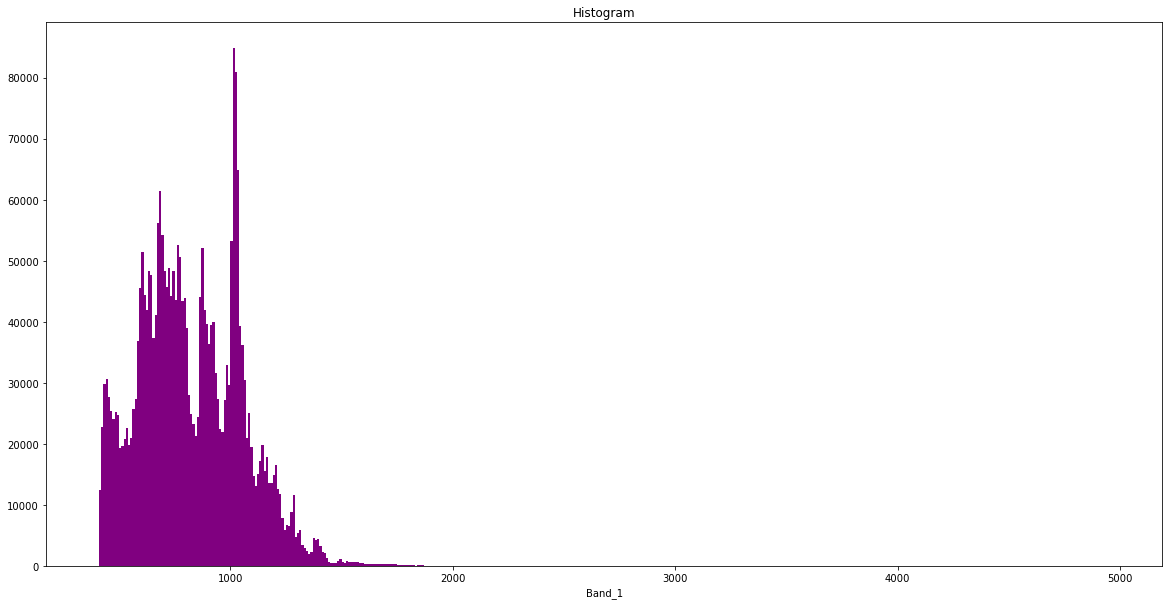

In [14]:
## MAKE HISTOGRAM OF DTM_DEBRIS

# set figure parameters
f,ax=plt.subplots(figsize=(20,10))

# This does the job for 'dtm_debris'
dtm_debris.plot.hist(ax=ax,
              color='purple',
             bins=binss)
# get histogram data
p=ax.patches
# p[0].get_xy() gives xy coordinate of left edge of first bar (lower bin edge)
# p[0].get_width() gives width of bar (bin size)
# p[0].get_height() gives height of first bar (number pixels in bin)
heights=[patch.get_height() for patch in p]
binedgeL=[patch.get_xy() for patch in p]
# get first element of two element tuples
binedgeL=[x[0] for x in binedgeL]
# convert lists to array
binedgeL=np.array(binedgeL)
# heights is array of number of pixels in each bin
heights=np.array(heights)
# binedgeL and binedgeR are arrays of bin edges at 10 m intervals
binedgeR=binedgeL+binsize
# bincenters is array of bin centers in m
bincenters=np.mean([binedgeR,binedgeL],axis=0)

# collate table with generic variables
data={'binedgeR': binedgeR, 'binedgeL': binedgeL, 'bincenters':bincenters, 'heights': heights}
# assign to pandas dataframe specific to dirty ice
debrisbins=pd.DataFrame(data=data)

plt.show()

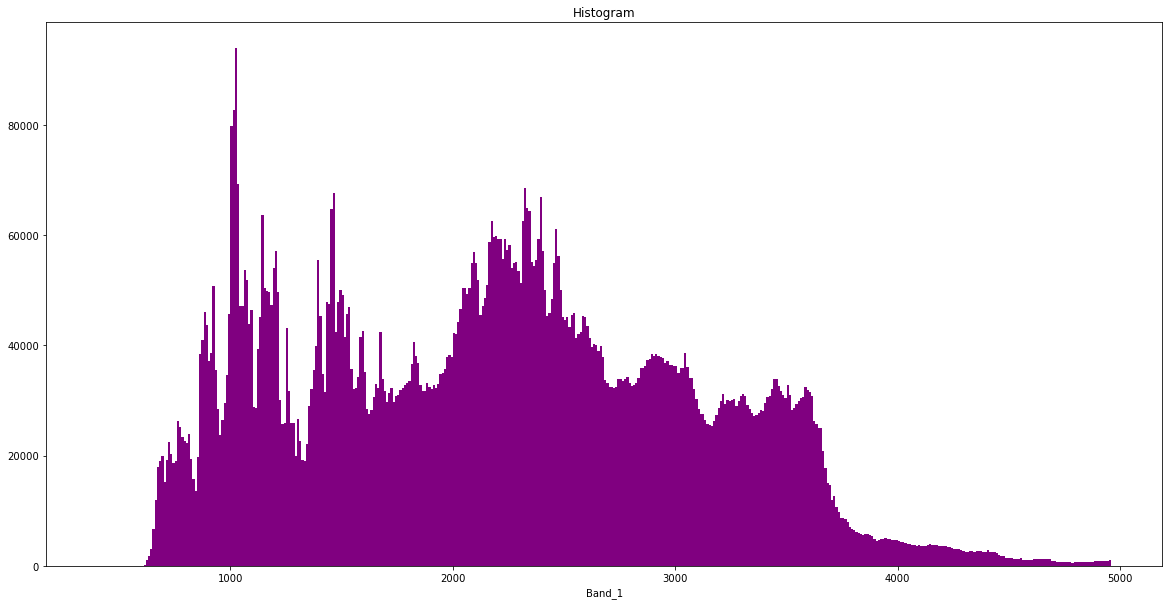

In [15]:
## MAKE HISTOGRAM OF DTM_CLEAN

# set figure parameters
f,ax=plt.subplots(figsize=(20,10))

# This does the job for 'dtm_clean'
dtm_clean.plot.hist(ax=ax,
              color='purple',
             bins=binss)
# get histogram data
p=ax.patches
# p[0].get_xy() gives xy coordinate of left edge of first bar (lower bin edge)
# p[0].get_width() gives width of bar (bin size)
# p[0].get_height() gives height of first bar (number pixels in bin)
heights=[patch.get_height() for patch in p]
binedgeL=[patch.get_xy() for patch in p]
# get first element of two element tuples
binedgeL=[x[0] for x in binedgeL]
# convert lists to array
binedgeL=np.array(binedgeL)
# heights is array of number of pixels in each bin
heights=np.array(heights)
# binedgeL and binedgeR are arrays of bin edges at 10 m intervals
binedgeR=binedgeL+binsize
# bincenters is array of bin centers in m
bincenters=np.mean([binedgeR,binedgeL],axis=0)

# collate table with generic variables
data={'binedgeR': binedgeR, 'binedgeL': binedgeL, 'bincenters':bincenters, 'heights': heights}
# assign to pandas dataframe specific to clean ice
cleanbins=pd.DataFrame(data=data)

plt.show()

In [16]:
## SAVE HISTOGRAM INFO AS PICKLE  

# fullbins, debrisbins, and cleanbins are are panda dataframes
# data are numbers of 5m x 5m pixels in each of 456 bins that separate pixels into 10m elevation bands. 
# So area in each elevation band is "heights" * 25 m.

# Define relative path to file
pickle_path = os.path.join(data_dir,
                           'fullbins.pickle')
# # save variable dataframes
fullbins.to_pickle(pickle_path)

# Define relative path to file
pickle_path = os.path.join(data_dir,
                           'cleanbins.pickle')
# # save variable dataframes
cleanbins.to_pickle(pickle_path)

# Define relative path to file
pickle_path = os.path.join(data_dir,
                           'debrisbins.pickle')
# # save variable dataframes
debrisbins.to_pickle(pickle_path)
